Data classification
Data classification considers the problem of a partitioning of the attribute values into mutually exclusive and exhaustive groups. The precise manner in which this is done will be a function of the measurement scale of the attribute in question. For quantitative attributes (ordinal, interval, ratio scales) the classes will have an explicit ordering. More formally, the classification problem is to define class boundaries such that $$
c_j < y_i <=  c_{j+1} for all y_i in C_{j+1}
$$ where $y_i$ is the value of the attribute for spatial location $i$, $j$ is a class index, and $c_j$ represents the lower bound of interval $j$.
Different classification schemes obtain from their definition of the class boundaries. The choice of the classification scheme should take into consideration the statistical distribution of the attribute values.


In [43]:
import pandas as pd
import geopandas as gpd
import libpysal.api as lp
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
import contextily as ctx
import shapely.geometry as geom
%matplotlib inline

In [7]:
import seaborn as sbn

In [8]:
df = gpd.read_file('/Users/blaze/OneDrive/Work/GeoSpatial/berlin-districts.geojson.txt')

In [9]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [10]:
df.head()

,district,district_group,median_price,geometry
0,Blankenfelde/Niederschönhausen,Pankow,37.5,(POLYGON ((1493006.880445722 6912074.798336806...
1,Helmholtzplatz,Pankow,58.0,"(POLYGON ((1493245.549433984 6900059.69597819,..."
2,Wiesbadener Straße,Charlottenburg-Wilm.,50.0,"(POLYGON ((1481381.45206371 6885170.697768607,..."
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,99.0,(POLYGON ((1526159.828554794 6872101.043604896...
4,Müggelheim,Treptow - Köpenick,25.0,(POLYGON ((1529265.085750472 6874326.842288786...


In [12]:
print(df['geometry'][0])

MULTIPOLYGON (((1493006.880445722 6912074.798336806, 1492997.640927987 6912068.748064148, 1492896.117552384 6912025.846261609, 1492885.87615923 6912021.079408809, 1492629.17341346 6911907.959155816, 1492501.044679558 6911851.491295381, 1492517.186005724 6911840.49110905, 1492785.799937008 6911477.676744623, 1492832.66544263 6911414.428824451, 1492847.359615417 6911394.629577944, 1492926.953051334 6911311.766594657, 1493081.798463028 6911157.592390901, 1493154.601410006 6911100.579850263, 1493190.112327568 6911072.715347485, 1493196.346219054 6911039.351399023, 1493353.418020561 6910296.214554274, 1493367.555595894 6910241.957627266, 1493443.475488615 6909910.008534672, 1493446.035836902 6909892.595791618, 1493444.811322504 6909813.780690152, 1493461.843204595 6909718.470438234, 1493491.231550165 6909631.775749456, 1493527.966982127 6909469.202820917, 1493548.672407414 6909360.517231234, 1493559.247759039 6909303.150894338, 1493593.979440168 6909268.87791102, 1493676.801141317 6909157.6

In [14]:
len(df)

138

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


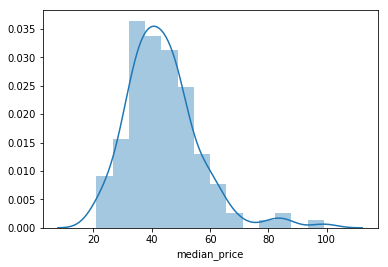

In [15]:
sbn.distplot(df['median_price'])

/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


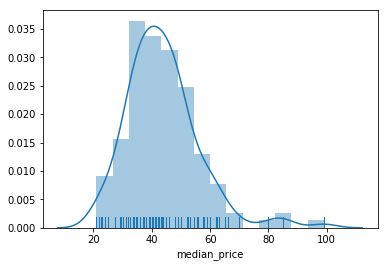

In [16]:
sbn.distplot(df['median_price'], rug=True)

Now we can look at the spatial distribution.

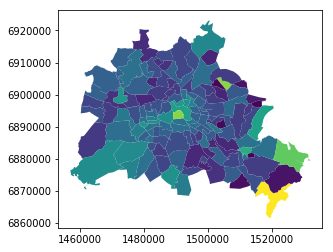

In [17]:
df.plot(column='median_price')

/anaconda2/lib/python2.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


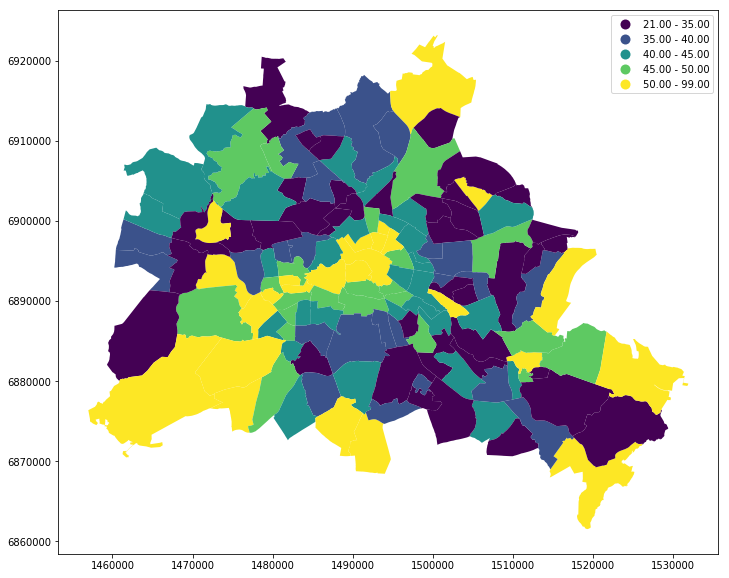

In [18]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='median_price', scheme='Quantiles', legend = True, ax=ax)

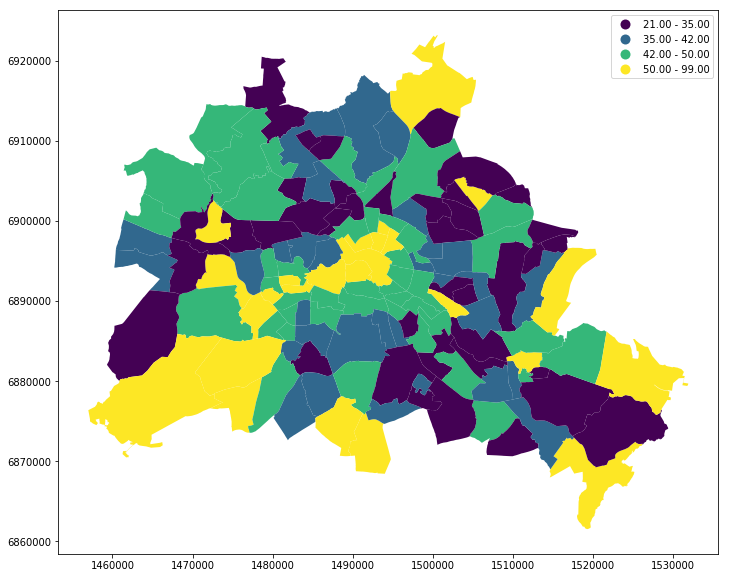

In [19]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='median_price', scheme='Quantiles', k=4, legend=True, ax=ax)

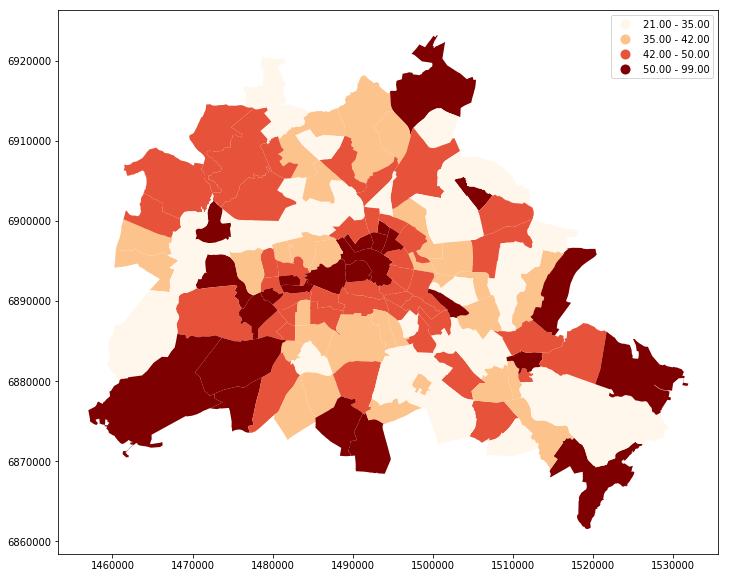

In [20]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='median_price', scheme='Quantiles', k=4, legend=True, ax=ax, 
        cmap='OrRd')

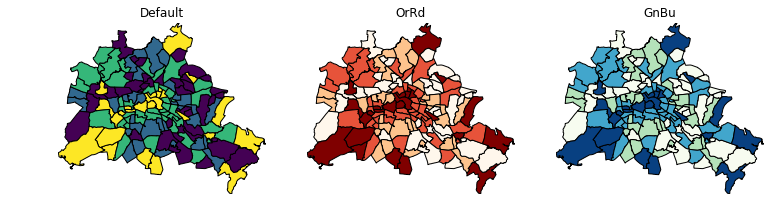

In [21]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4), subplot_kw=dict(aspect='equal'))
df.plot(column='median_price', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Default")
df.plot(column='median_price', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("OrRd")
df.plot(column='median_price', ax=ax[2], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("GnBu")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

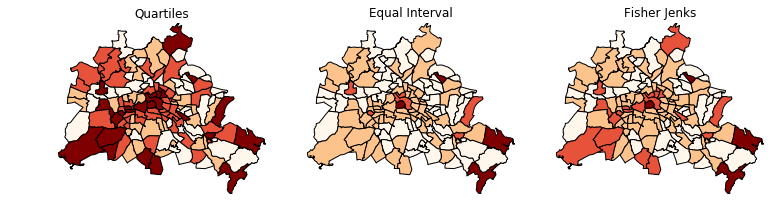

In [22]:
f,ax = plt.subplots(1,3,figsize=(3.16*4,4), subplot_kw=dict(aspect='equal'))
df.plot(column='median_price', ax=ax[0], edgecolor='k',
        scheme="quantiles", cmap='OrRd', k=4)
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Quartiles")
df.plot(column='median_price', ax=ax[1], edgecolor='k',
        scheme='equal_interval', cmap='OrRd', k=4)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Equal Interval")
df.plot(column='median_price', ax=ax[2], edgecolor='k',
       scheme='fisher_jenks', cmap='OrRd', k=4)
ax[2].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[2].set_title("Fisher Jenks")
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

GeoPandas supports a subset of the map classification schemes that are available in PySAL. The selected ones have a similar function signature that allowed for a simple soft dependency. Since the initial implementation, PySAL has begun a major refactoring, and as part of this the classification scheme have been moved into their own package: mapclassify. We can explore some of the other classifiers within this package:

In [24]:
import mapclassify.api as mc

In [25]:
mc.CLASSIFIERS

('Box_Plot',
 'Equal_Interval',
 'Fisher_Jenks',
 'Fisher_Jenks_Sampled',
 'HeadTail_Breaks',
 'Jenks_Caspall',
 'Jenks_Caspall_Forced',
 'Jenks_Caspall_Sampled',
 'Max_P_Classifier',
 'Maximum_Breaks',
 'Natural_Breaks',
 'Quantiles',
 'Percentiles',
 'Std_Mean',
 'User_Defined')

Equal intervals splits the data range into $k$ equal-width bins:

In [27]:
y = df['median_price']
type(y)

pandas.core.series.Series

In [28]:
ea5 = mc.Equal_Interval(y, k=5)

In [29]:
type(ea5)

mapclassify.classifiers.Equal_Interval

In [30]:
ea5

             Equal Interval             
 
Lower            Upper             Count
         x[i] <= 36.600               40
36.600 < x[i] <= 52.200               74
52.200 < x[i] <= 67.800               19
67.800 < x[i] <= 83.400                2
83.400 < x[i] <= 99.000                3

In [31]:
ea5.yb

array([1, 2, 1, 4, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0,
       1, 4, 1, 0, 0, 1, 1, 1, 0, 3, 1, 1, 0, 1, 3, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 2,
       4, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 2, 0, 1, 0])

In [32]:
q5 = mc.Quantiles(y, k=5)
q5

               Quantiles                
 
Lower            Upper             Count
         x[i] <= 35.000               39
35.000 < x[i] <= 40.000               23
40.000 < x[i] <= 45.000               29
45.000 < x[i] <= 50.000               22
50.000 < x[i] <= 99.000               25

In [33]:
q5.yb

array([1, 4, 3, 4, 0, 0, 0, 3, 2, 4, 1, 3, 1, 4, 4, 1, 0, 2, 0, 3, 3, 3,
       3, 1, 0, 2, 3, 2, 1, 2, 0, 0, 3, 2, 0, 2, 4, 4, 4, 2, 3, 2, 3, 3,
       2, 1, 1, 3, 2, 2, 0, 0, 0, 0, 4, 3, 4, 4, 4, 1, 2, 2, 0, 2, 0, 0,
       2, 4, 2, 0, 1, 3, 1, 3, 0, 4, 2, 3, 0, 3, 4, 1, 3, 0, 0, 0, 0, 1,
       1, 2, 2, 0, 3, 0, 4, 4, 2, 4, 1, 0, 4, 3, 4, 0, 2, 2, 4, 1, 0, 4,
       4, 2, 2, 0, 1, 2, 3, 2, 1, 1, 2, 4, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       0, 0, 4, 0, 1, 0])

In [34]:
y.shape

(138,)

In [35]:
np.unique(y).shape

(57,)

## Selecting a classification based on fit
Choropleth mapping can be used for different purposes. The most common is to select a classification that provides a balance between maximizing the differences between observations in each bin, and minimizing the intra-bin heterogeneity.

The classifiers in PySAL have underlying measures of fit for this purpose, but it is important to keep in mind these should only be used for classifiers with the same number of classes.

One such measure is the the absolute deviation around class
medians (ADCM). Let's use this to compare all k=5 classifiers:

In [36]:
q5 = mc.Quantiles(y, k=5)
ei5 = mc.Equal_Interval(y, k=5)
mb5 = mc.Maximum_Breaks(y, k=5)
fj5 = mc.Fisher_Jenks(y, k=5)
fits = [c.adcm for c in [q5, ei5, mb5, fj5]]
fits

[403.67, 492.83, 1045.83, 368.83]

As expected, Fisher Jenks is the optimal classifer.

## Outlier Detection
Another application of choropleth mapping is to identify either data errors or extreme values. There are a number of classifers that can be used to detect value outliers:

In [38]:
ht = mc.HeadTail_Breaks(y)
ht

            HeadTail_Breaks             
 
Lower            Upper             Count
         x[i] <= 43.767               74
43.767 < x[i] <= 53.654               42
53.654 < x[i] <= 64.932               15
64.932 < x[i] <= 78.571                3
78.571 < x[i] <= 87.250                3
87.250 < x[i] <= 99.000                1

In [39]:
std = mc.Std_Mean(y)
std

                 Std_Mean                
 
Lower            Upper              Count
         x[i] <= 18.771                 0
18.771 < x[i] <= 31.269                17
31.269 < x[i] <= 56.265               103
56.265 < x[i] <= 68.763                13
68.763 < x[i] <= 99.000                 5

In [40]:
bp = mc.Box_Plot(y)
bp

                Box Plot                
 
Lower            Upper             Count
         x[i] <= 12.500                0
12.500 < x[i] <= 35.000               39
35.000 < x[i] <= 42.000               31
42.000 < x[i] <= 50.000               43
50.000 < x[i] <= 72.500               21
72.500 < x[i] <= 99.000                4

## Using mapclassify with GeoPandas¶
Although only a subset of the PySAL classifiers are directly accessible from within GeoPandas, it is possible to combine external classifiers with GeoPandas:

In [41]:
bp

                Box Plot                
 
Lower            Upper             Count
         x[i] <= 12.500                0
12.500 < x[i] <= 35.000               39
35.000 < x[i] <= 42.000               31
42.000 < x[i] <= 50.000               43
50.000 < x[i] <= 72.500               21
72.500 < x[i] <= 99.000                4

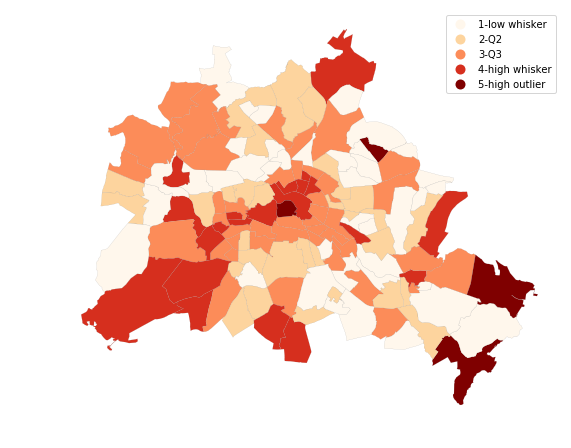

In [42]:
labels = ['0-low outlier', '1-low whisker',
          '2-Q2', '3-Q3', '4-high whisker', '5-high outlier']
bpl = [ labels[b] for b in bp.yb ]

f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=bpl).plot(column='cl', categorical=True, \
                                      k=4, cmap='OrRd', linewidth=0.1, ax=ax,\
                                      edgecolor='grey', legend=True)
ax.set_axis_off()
plt.show()